<a href="https://colab.research.google.com/github/safira123-pixel/PCVK_Genap_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pertemuan 5

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


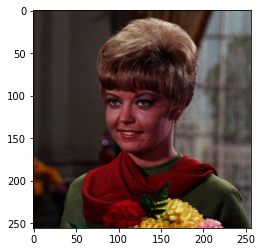

In [20]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img_f = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

# Praktikum

Nomor 1 Gamma Correction

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 5


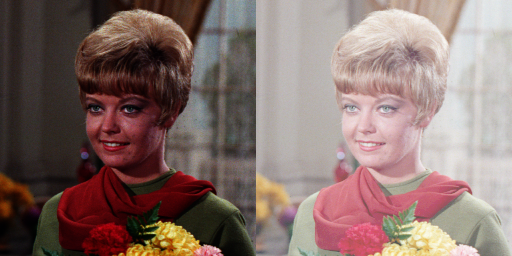

In [21]:
#1
print(' Gamma Correction pada citra ')
print('----------------------------------')
try: 
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)
     
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)


Nomor 2 Image depth

 Simulasi Image Depth 
----------------------
Masukkan nilai bit depth [1-7]: 2


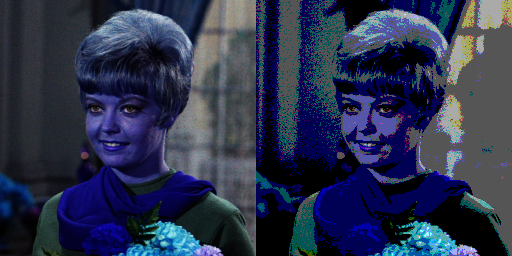

In [22]:
#2
original = cv.cvtColor(img_rgb, cv.IMREAD_GRAYSCALE)
gamma_image = np.zeros(original.shape, original.dtype)

print(' Simulasi Image Depth ')
print('----------------------')
try:
  bd = float(input('Masukkan nilai bit depth [1-7]: '))
except ValueError:
  print('Error, not a number')

bit = 2**bd
level = 255 / (bit - 1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

Nomor 3 Average Denoising

A. Average = 5

Nilai PSNR adalah 27.529501396007316 (dB)


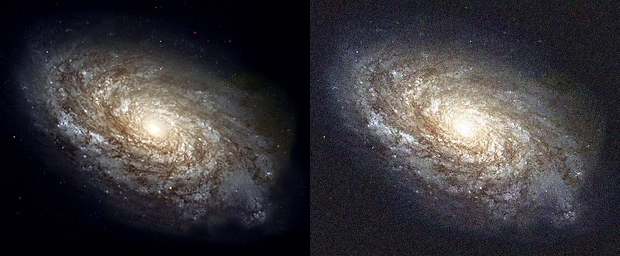

In [25]:
#3.1
import glob
from math import log10, sqrt
  
original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

B. Average : 30

Nilai PSNR adalah 27.520973958230712 (dB)


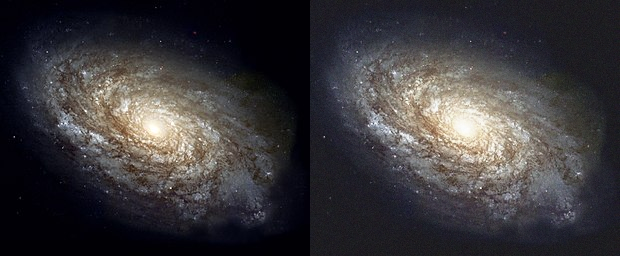

In [26]:
#3.2
dst = cv_img[0]
noise_number = 29 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

C. Average : 60

Nilai PSNR adalah 27.48765213773393 (dB)


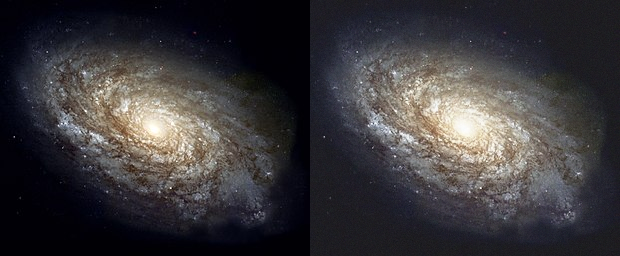

In [27]:
#3.3
dst = cv_img[0]
noise_number = 59 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

D. Average : 80

Nilai PSNR adalah 27.49700226011393 (dB)


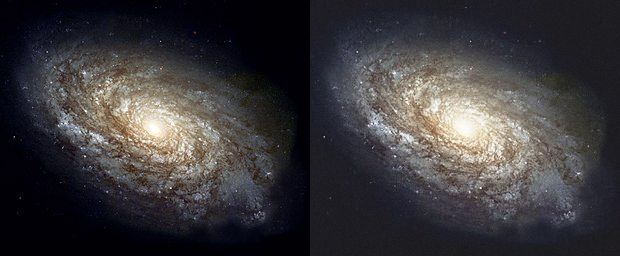

In [28]:
#3.4
dst = cv_img[0]
noise_number = 79 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

E. Average : 100

Nilai PSNR adalah 27.506462925103612 (dB)


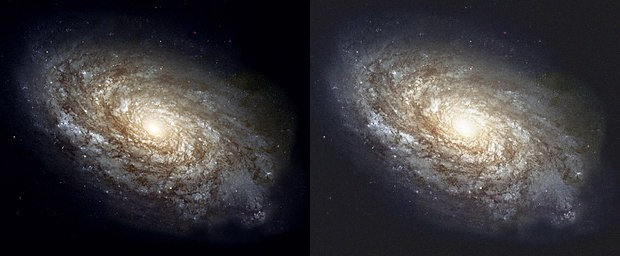

In [30]:
#3.5
dst = cv_img[0]
noise_number = 99 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Dari hasil PSNR diatas, kesimpulan yang dapat diambil adalah : 

Dari praktikum diatas dapat disimpulkan bahwa, semakin banyak Jumlah Citra
di Average maka hasil pada gambar semakin jernih. Hal ini terbukti ketika membandingkan gambar galaxy yang menggunakan jumlah citra di average 5 dengan gambar galaxy yang menggunakan jumlah citra di average 100



Nomor 4 Image Masking

a. AND

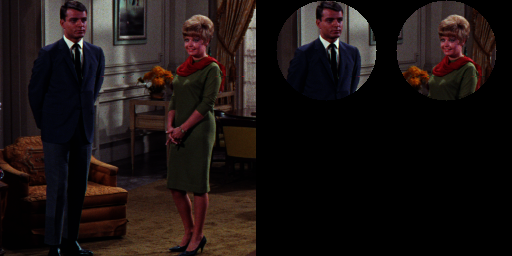

In [63]:
img_t = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

mask1 = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask1,(70,50),50,(255,255,255),-1)

mask2 = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask2,(190,50),50,(255,255,255),-1)
result = img_t & (mask1 + mask2)

teeth_frame = cv.hconcat((img_t, result))
cv2_imshow(teeth_frame)

Nomor 5

A. OR

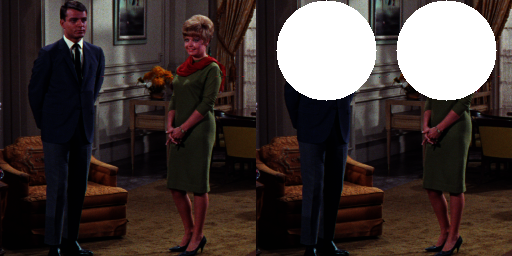

In [61]:
img_t = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

mask1 = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask1,(70,50),50,(255,255,255),-1)

mask2 = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask2,(190,50),50,(255,255,255),-1)
result = img_t | (mask1 + mask2)

teeth_frame = cv.hconcat((img_t, result))
cv2_imshow(teeth_frame)

B. NOT

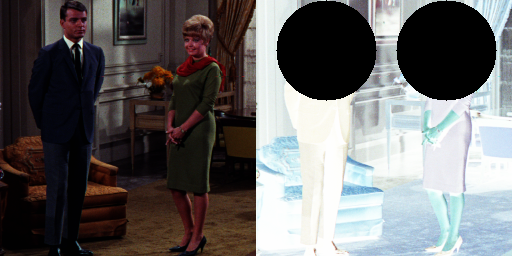

In [58]:
img_t = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

mask1 = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask1,(70,50),50,(255,255,255),-1)

mask2 = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask2,(190,50),50,(255,255,255),-1)
result = ~img_t & ~(mask1 + mask2)

teeth_frame = cv.hconcat((img_t, result))
cv2_imshow(teeth_frame)

C. NAND

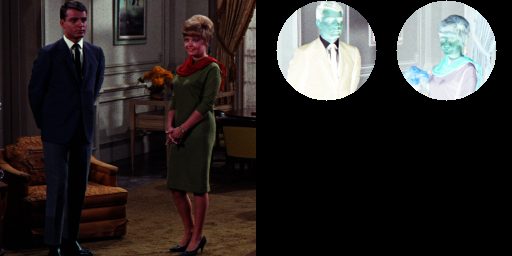

In [56]:
img_t = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

mask1 = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask1,(70,50),50,(255,255,255),-1)

mask2 = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask2,(190,50),50,(255,255,255),-1)
result = ~img_t & (mask1 + mask2)

teeth_frame = cv.hconcat((img_t, result))
cv2_imshow(teeth_frame)

D. XOR

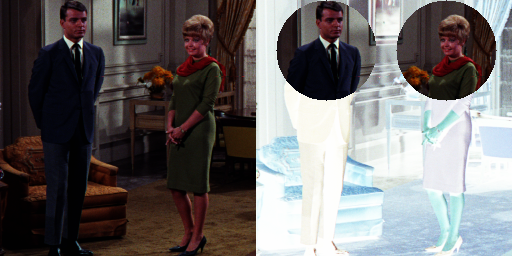

In [57]:
img_t = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

mask1 = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask1,(70,50),50,(255,255,255),-1)

mask2 = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask2,(190,50),50,(255,255,255),-1)
result = ~img_t ^ (mask1 + mask2)

teeth_frame = cv.hconcat((img_t, result))
cv2_imshow(teeth_frame)

Tuliskan hasil analisa anda: 

Nomor 1

Penambahan Nilai Gamma dapat mengasilkan citra lebih cerah. Semakin tinggi nilai gamma akan semakin cerah

Nomor 2

Kedalaman yang diimputkan mempengaruhi kualitas citra yang dihasilkan

Nomor 3

Dari praktikum diatas dapat disimpulkan bahwa, semakin banyak Jumlah Citra
di Average maka hasil pada gambar semakin jernih. Hal ini terbukti ketika membandingkan gambar galaxy yang menggunakan jumlah citra di average 5 dengan gambar galaxy yang menggunakan jumlah citra di average 100

Nomor 4

Pada percobaan menggunakan logika AND hasil yang terjadi adalah menggambungkan antara citra awal dengan dua citra mask yang berbentuk lingkaran dan hasil akhirnya adalah menghasilkan citra yang berwarna hitam dengan dua lingkaran yang menunjukkan citra awal sebelumnya

Nomor 5

1. Pada percobaan menggunakan logika OR hasil yang terjadi adalah kebalikan dari logika AND menggambungkan antara citra awal dengan dua citra mask menghasilkan citra yang berwarna dengan dua lingkaran yang hitam menutupi citra awal sebelumnya

2. Pada percobaan menggunakan logika NOT yang terjadi adalah sama dengan OR Namun pada citra yang tidak tertutup berubah menjadi citra invers

3. Pada percobaan menggunakan logika NAND yang terjadi adalah sama dengan logika AND namun pada dua lingkaran yang menghasilkan citra tersebut berubah menjadi citra invers

4. Pada percobaan menggunakan logika XOR yang terjadi adalah pada citra yang dilingkari tidak berubah, namun pada citra diluar kedua lingkaran berubah menjadi citra invers